# Data visualisation and exploration

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings

In [2]:
CREMA = '../raw_data'
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [3]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    
    if part[2] == 'SAD':
        emotion.append('sad')
    elif part[2] == 'ANG':
        emotion.append('angry')
    elif part[2] == 'DIS':
        emotion.append('disgust')
    elif part[2] == 'FEA':
        emotion.append('fear')
    elif part[2] == 'HAP':
        emotion.append('happy')
    elif part[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['emotion'])
#CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)

In [4]:
CREMA_df

,emotion,gender,path
0,angry,male,../raw_data1001_DFA_ANG_XX.wav
1,disgust,male,../raw_data1001_DFA_DIS_XX.wav
2,fear,male,../raw_data1001_DFA_FEA_XX.wav
3,happy,male,../raw_data1001_DFA_HAP_XX.wav
4,neutral,male,../raw_data1001_DFA_NEU_XX.wav
...,...,...,...
4667,fear,female,../raw_data1058_IEO_FEA_HI.wav
4668,fear,female,../raw_data1058_IEO_FEA_LO.wav
4669,fear,female,../raw_data1058_IEO_FEA_MD.wav
4670,happy,female,../raw_data1058_IEO_HAP_HI.wav


In [5]:
def combo(df):
    return f'{df[1]}_{df[0]}'

def sad(x):
    return 1 if x.lower() == 'sad' else 0

def angry(x):
    return 1 if x.lower() == 'angry' else 0

def disgust(x):
    return 1 if x.lower() == 'disgust' else 0

def fear(x):
    return 1 if x.lower() == 'fear' else 0

def happy(x):
    return 1 if x.lower() == 'happy' else 0

def neutral(x):
    return 1 if x.lower() == 'neutral' else 0

In [6]:
CREMA_df['gender_emotion'] = CREMA_df.apply(combo,axis=1)
CREMA_df['sad'] = CREMA_df['emotion'].apply(sad)
CREMA_df['angry'] = CREMA_df['emotion'].apply(angry)
CREMA_df['disgust'] = CREMA_df['emotion'].apply(disgust)
CREMA_df['fear'] = CREMA_df['emotion'].apply(fear)
CREMA_df['happy'] = CREMA_df['emotion'].apply(happy)
CREMA_df['neutral'] = CREMA_df['emotion'].apply(neutral)

In [7]:
CREMA_df

,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral
0,angry,male,../raw_data1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0
1,disgust,male,../raw_data1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0
2,fear,male,../raw_data1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0
3,happy,male,../raw_data1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0
4,neutral,male,../raw_data1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4667,fear,female,../raw_data1058_IEO_FEA_HI.wav,female_fear,0,0,0,1,0,0
4668,fear,female,../raw_data1058_IEO_FEA_LO.wav,female_fear,0,0,0,1,0,0
4669,fear,female,../raw_data1058_IEO_FEA_MD.wav,female_fear,0,0,0,1,0,0
4670,happy,female,../raw_data1058_IEO_HAP_HI.wav,female_happy,0,0,0,0,1,0


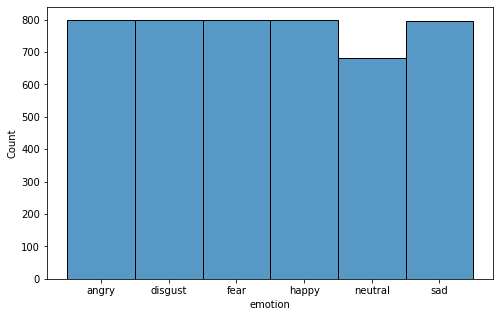

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(CREMA_df.emotion);

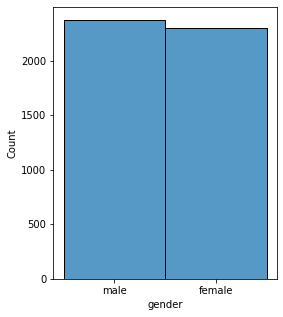

In [9]:
plt.figure(figsize=(4,5))
sns.histplot(CREMA_df.gender);

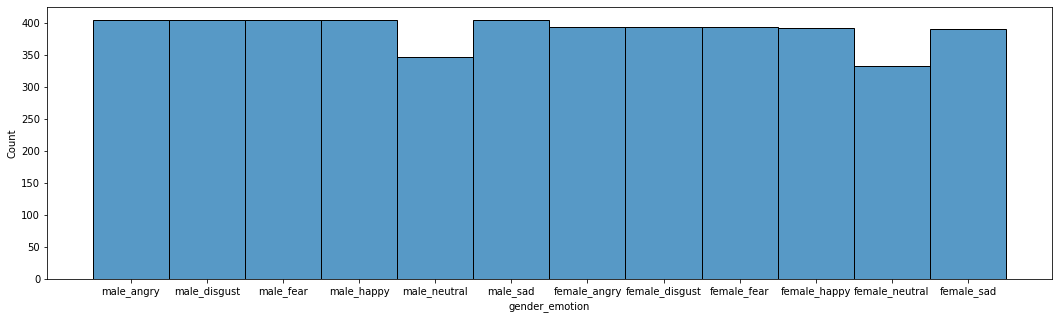

In [10]:
plt.figure(figsize=(18,5))
sns.histplot(CREMA_df.gender_emotion);

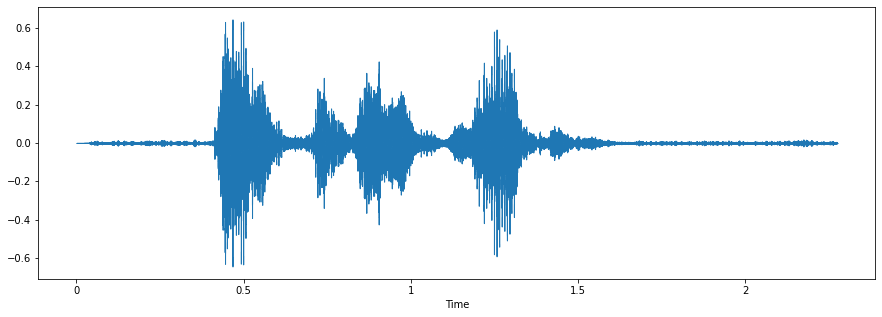

In [11]:
# use the well known Librosa library for this task 
fname = CREMA + '/1001_DFA_ANG_XX.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
Audio(fname)

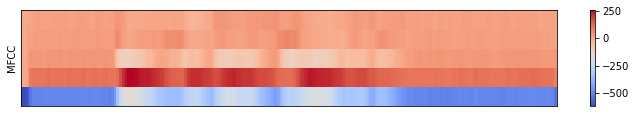

In [12]:
SAMPLE_RATE = 44100  
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 5) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

In [27]:
mfcc

array([[-6.22793884e+02, -6.22793884e+02, -6.01033569e+02,
        -5.36486816e+02, -5.08355011e+02, -5.06353516e+02,
        -5.04952209e+02, -5.07510468e+02, -5.06217957e+02,
        -5.02474365e+02, -5.02620148e+02, -5.06131012e+02,
        -5.04965393e+02, -5.05690582e+02, -5.04502167e+02,
        -5.00696686e+02, -5.03830750e+02, -5.02922180e+02,
        -5.04782318e+02, -5.04651978e+02, -5.02409241e+02,
        -5.03555817e+02, -4.99126526e+02, -4.99832916e+02,
        -5.02234833e+02, -5.06315979e+02, -5.00562103e+02,
        -4.95930298e+02, -5.01962555e+02, -5.07181213e+02,
        -5.06627502e+02, -5.03085938e+02, -5.09368835e+02,
        -5.05079102e+02, -4.56716095e+02, -3.45869385e+02,
        -2.54634674e+02, -1.97233307e+02, -1.66160812e+02,
        -1.54980591e+02, -1.63203293e+02, -1.73588760e+02,
        -1.87432449e+02, -2.02792130e+02, -2.21742950e+02,
        -2.38642227e+02, -2.50248001e+02, -2.62857239e+02,
        -2.79673279e+02, -3.04491730e+02, -3.33574432e+0

/var/folders/y_/q_7ncy856qz3xvy8zy_n1hzh0000gn/T/ipykernel_90971/2998307289.py:2: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.9765668e-07 3.1930197e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)


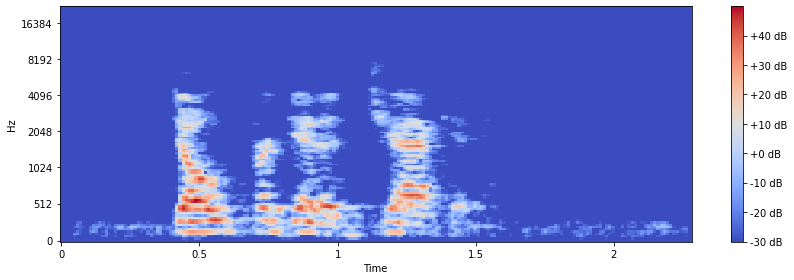

In [13]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout();

In [14]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) 
y_harmonic, y_percussive = librosa.effects.hpss(y)
Audio(y_harmonic, rate=sr)

In [15]:
Audio(y_percussive, rate=sr)

/var/folders/y_/q_7ncy856qz3xvy8zy_n1hzh0000gn/T/ipykernel_90971/848197121.py:2: FutureWarning: Pass y=[-6.5192664e-11 -7.5087402e-11 -5.5538310e-11 ...  5.9185983e-05
  5.5071159e-05  5.0919440e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
/var/folders/y_/q_7ncy856qz3xvy8zy_n1hzh0000gn/T/ipykernel_90971/848197121.py:6: FutureWarning: Pass y=[ 6.5421939e-11  7.5284355e-11  5.5670486e-11 ... -5.8188351e-05
 -5.1878167e-05 -5.0919472e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)


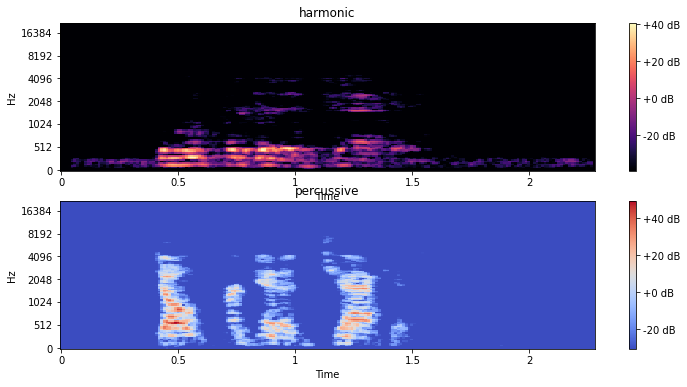

In [16]:
# harmonic 
melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
log_h = librosa.amplitude_to_db(melspec)

# percussive
melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)
log_p = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram of both harmonic and percussive
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_h, sr=sr, x_axis='time', y_axis='mel')
plt.title('harmonic')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_p, sr=sr, x_axis='time', y_axis='mel')
plt.title('percussive')
plt.colorbar(format='%+02.0f dB')

/Users/julian/.pyenv/versions/3.8.12/envs/speech-emotion-recognition/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=785
  return f(*args, **kwargs)


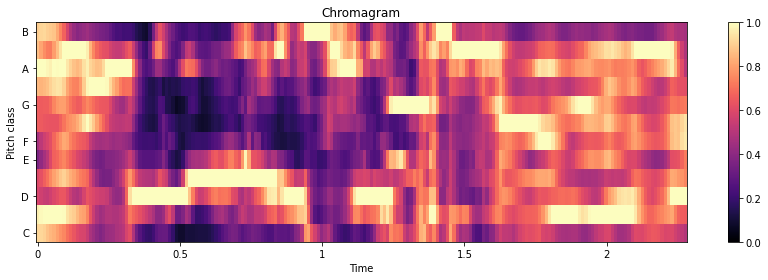

In [17]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5)
C = librosa.feature.chroma_cqt(y=y, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

# Creating sample data

In [18]:
#number of rows per gender/emotion combo
n = 100

In [19]:
group = CREMA_df.groupby('gender_emotion')
CREMA_sample = group.head(n)

In [20]:
CREMA_df.gender_emotion.value_counts()/len(CREMA_df)

male_angry        0.086687
male_disgust      0.086687
male_fear         0.086687
male_happy        0.086687
male_sad          0.086687
female_angry      0.084332
female_disgust    0.084332
female_fear       0.084332
female_happy      0.084118
female_sad        0.083690
male_neutral      0.074272
female_neutral    0.071490
Name: gender_emotion, dtype: float64

In [21]:
CREMA_sample.gender_emotion.value_counts()

male_angry        100
male_disgust      100
male_fear         100
male_happy        100
male_neutral      100
male_sad          100
female_angry      100
female_disgust    100
female_fear       100
female_happy      100
female_neutral    100
female_sad        100
Name: gender_emotion, dtype: int64

In [22]:
CREMA_sample

,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral
0,angry,male,../raw_data1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0
1,disgust,male,../raw_data1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0
2,fear,male,../raw_data1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0
3,happy,male,../raw_data1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0
4,neutral,male,../raw_data1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1707,neutral,male,../raw_data1022_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1
1721,neutral,male,../raw_data1022_IEO_NEU_XX.wav,male_neutral,0,0,0,0,0,1
1729,neutral,male,../raw_data1022_IOM_NEU_XX.wav,male_neutral,0,0,0,0,0,1
1735,neutral,male,../raw_data1022_ITH_NEU_XX.wav,male_neutral,0,0,0,0,0,1


# Feature extraction

In [23]:
feature_list = ['chroma_stft'
,'chroma_cqt'
,'chroma_cens'
,'melspectrogram'
,'mfcc'
,'spectral_centroid'
,'spectral_bandwidth'
,'spectral_contrast'
,'spectral_rolloff'
,'poly_features'
,'tonnetz'
,'tempogram'
,'fourier_tempogram']

In [24]:
librosa_list = [librosa.feature.chroma_stft
,librosa.feature.chroma_cqt
,librosa.feature.chroma_cens
,librosa.feature.melspectrogram
,librosa.feature.mfcc
,librosa.feature.spectral_centroid
,librosa.feature.spectral_bandwidth
,librosa.feature.spectral_contrast
,librosa.feature.spectral_rolloff
,librosa.feature.poly_features
,librosa.feature.tonnetz
,librosa.feature.tempogram
,librosa.feature.fourier_tempogram]

In [25]:
df_list = [
pd.DataFrame([[None,None]]*7442, columns=['chroma_stft_mean','chroma_stft_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['chroma_cqt_mean','chroma_cqt_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['chroma_cens_mean','chroma_cens_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['melspectrogram_mean','melspectrogram_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['mfcc_mean','mfcc_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_centroid_mean','spectral_centroid_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_bandwidth_mean','spectral_bandwidth_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_contrast_mean','spectral_contrast_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['spectral_rolloff_mean','spectral_rolloff_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['poly_features_mean','poly_features_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['tonnetz_mean','tonnetz_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['tempogram_mean','tempogram_variance'])
,pd.DataFrame([[None,None]]*7442, columns=['fourier_tempogram_mean','fourier_tempogram_variance'])]

In [26]:
sample_rate = 44100

for i in range(len(feature_list)):
    # loop feature extraction over the entire dataset
    counter=0
    for path in CREMA_df['path']:
        X, sample_rate = librosa.load(path
                                      , res_type='kaiser_fast'
                                      ,duration=2.5
                                      ,sr=sample_rate
                                      ,offset=0.5
                                     )
        sample_rate = np.array(sample_rate)
        
        # mean as the feature. Could do min and max etc as well. 
        features = np.mean(librosa_list[i](y=X, 
                                            sr=sample_rate),
                        axis=0)
        df_list[i][f'{feature_list[i]}_mean'][counter] = features.mean()
        df_list[i][f'{feature_list[i]}_variance'][counter] = features.var()
        counter=counter+1

/Users/julian/.pyenv/versions/3.8.12/envs/speech-emotion-recognition/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: '../raw_data1001_DFA_ANG_XX.wav'

In [ ]:
#rms
rms_df = pd.DataFrame([[None,None]]*7442,columns=['rms_mean','rms_variance'])
sample_rate = 44100
# loop feature extraction over the entire dataset
counter=0
for path in CREMA_df['path']:
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    features = np.mean(librosa.feature.rms(y=X),
                    axis=0)
    rms_df['rms_mean'][counter] = features.mean()
    rms_df['rms_variance'][counter] = features.var()
    
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(rms_df))
rms_df

In [ ]:
#spectral_flatness
spectral_flatness_df = pd.DataFrame([[None,None]]*7442,columns=['spectral_flatness_mean','spectral_flatness_variance'])
sample_rate = 44100
# loop feature extraction over the entire dataset
counter=0
for path in CREMA_df['path']:
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    features = np.mean(librosa.feature.spectral_flatness(y=X),
                    axis=0)
    spectral_flatness_df['spectral_flatness_mean'][counter] = features.mean()
    spectral_flatness_df['spectral_flatness_variance'][counter] = features.var()
    
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(spectral_flatness_df))
spectral_flatness_df

In [ ]:
#zero_crossing_rate
zero_crossing_df = pd.DataFrame([[None,None]]*7442,columns=['zero_crossing_mean','zero_crossing_variance'])
sample_rate = 44100
# loop feature extraction over the entire dataset
counter=0
for path in CREMA_df['path']:
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=sample_rate
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    features = np.mean(librosa.feature.zero_crossing_rate(y=X),
                    axis=0)
    zero_crossing_df['zero_crossing_mean'][counter] = features.mean()
    zero_crossing_df['zero_crossing_variance'][counter] = features.var()
    
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(zero_crossing_df))
zero_crossing_df

In [ ]:
df_list.append([rms_df,spectral_flatness_df,zero_crossing_df])

In [ ]:
final_df = df_list[0]
for df in df_list[1:]:
    final_df = final_df.join(df)
    

In [ ]:
final_df = final_df.astype(float)

In [ ]:
corr = final_df.corr()
plt.figure(figsize=(15,15))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "coolwarm")

# Machine learning for feature engineering

In [ ]:
# Use this cell to regroup all your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier, Ridge, RidgeClassifier, ElasticNet, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_log_error, mean_squared_error
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix, classification_report, make_scorer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.tree import DecisionTreeClassifier,export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,BaggingClassifier,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier,VotingClassifier,VotingRegressor,StackingClassifier,StackingRegressor
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor, XGBClassifier

In [ ]:
final_df.head()

In [ ]:
data = final_df.copy()
X = data

In [ ]:
CREMA_df.head()

In [ ]:
#CREMA_df.to_csv('targets.csv')
#final_df.to_csv('mean_variance.csv')

In [ ]:
le = LabelEncoder()

In [ ]:
targets = CREMA_df[['emotion','gender','gender_emotion','sad','angry','disgust','fear','happy','neutral']]

## Emotion baseline

Dummy score to beat will be 1/6 or 0.167

In [ ]:
le.fit(targets['emotion'])
y = le.transform(targets['emotion'])
y

In [ ]:
preproc_pipe = Pipeline([('scaler', MinMaxScaler())])

In [ ]:
preproc_pipe

In [ ]:
pipe_baseline = make_pipeline(preproc_pipe, RandomForestClassifier())
pipe_baseline

In [ ]:
cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

Score is ~46%

Better than a random guess

## Gender baseline

Dummy score to beat will be 0.5

In [ ]:
le.fit(targets['gender'])
y = le.transform(targets['gender'])

In [ ]:
cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

Score is ~84%

Ok looks like we can determine the gender quite well on a small sample

## Gender/emotion combo

In [ ]:
le.fit(targets['gender_emotion'])
y = le.transform(targets['gender_emotion'])

In [ ]:
cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='accuracy')
score_baseline = cv_results['test_score'].mean()
score_baseline

Score is ~0.37

Looks like we loose a bit of accuracy when combining gender and emotion as a target 

In [ ]:
## sad

le.fit(targets['sad'])
y = le.transform(targets['sad'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## angry

le.fit(targets['angry'])
y = le.transform(targets['angry'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## disgust

le.fit(targets['disgust'])
y = le.transform(targets['disgust'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## fear

le.fit(targets['fear'])
y = le.transform(targets['fear'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## happy

le.fit(targets['happy'])
y = le.transform(targets['happy'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

In [ ]:
## neutral

le.fit(targets['neutral'])
y = le.transform(targets['neutral'])

cv_results = cross_validate(pipe_baseline,X,y,cv=5,scoring='precision')
score_baseline = cv_results['test_score'].mean()
score_baseline

# Grid searching

In [ ]:
pipe_xgb = make_pipeline(preproc_pipe, XGBClassifier(eval_metric='mlogloss',use_label_encoder=False))

In [ ]:
le.fit(targets['emotion'])
y = le.transform(targets['emotion'])

cv_results = cross_validate(pipe_xgb,X,y,cv=5,scoring='accuracy')
score_xgb = cv_results['test_score'].mean()
score_xgb

In [ ]:
from scipy import stats

In [ ]:
pipe_xgb.get_params()

In [ ]:
grid = {
        'xgbclassifier__n_estimators': stats.randint(50,150),
        'xgbclassifier__max_depth': stats.randint(0,50),
        'xgbclassifier__learning_rate': stats.uniform(0,0.5),
        'xgbclassifier__gamma': stats.uniform(0,10),
        'xgbclassifier__reg_alpha': stats.uniform(0,20),
        'xgbclassifier__min_child_weight': stats.uniform(0,5),
        'xgbclassifier__subsample': stats.uniform(0,1),
        'xgbclassifier__colsample_bytree': stats.uniform(0,1),        
}

search = RandomizedSearchCV(pipe_xgb, grid, 
                            scoring='accuracy',
                            n_iter=50,  
                            cv=5,
                           random_state=0)

search.fit(X, y)

In [ ]:
search.best_params_

In [ ]:
search.best_score_